Some explanation...

-- Alexander Gavrikov, June 2020
***

In [1]:
import matplotlib.pyplot as plt

from VortexModel import * 
from VortexCriteria_Eulerian import * 
from Vorticity import vertical_vorticity

# few if my favorite things (in notebook)
%config InlineBackend.figure_format = 'retina'

Grid settings

In [2]:
N = 120
x_start, x_end = -2.0, 2.0
y_start, y_end = -2.0, 2.0

x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)

X, Y = np.meshgrid(x, y)

Boundary condition: pressure field at the center of the domain

In [3]:
center = [ 0, 0 ] 
p = pressure(X, Y, center=center)

Vortex

In [4]:
ui, vi = VortexModel_Simple(p, 20000.)

Modulate the background flow

In [5]:
umax = 0
flow='flat'
u, v = background_flow(ui, vi, flow, umax)

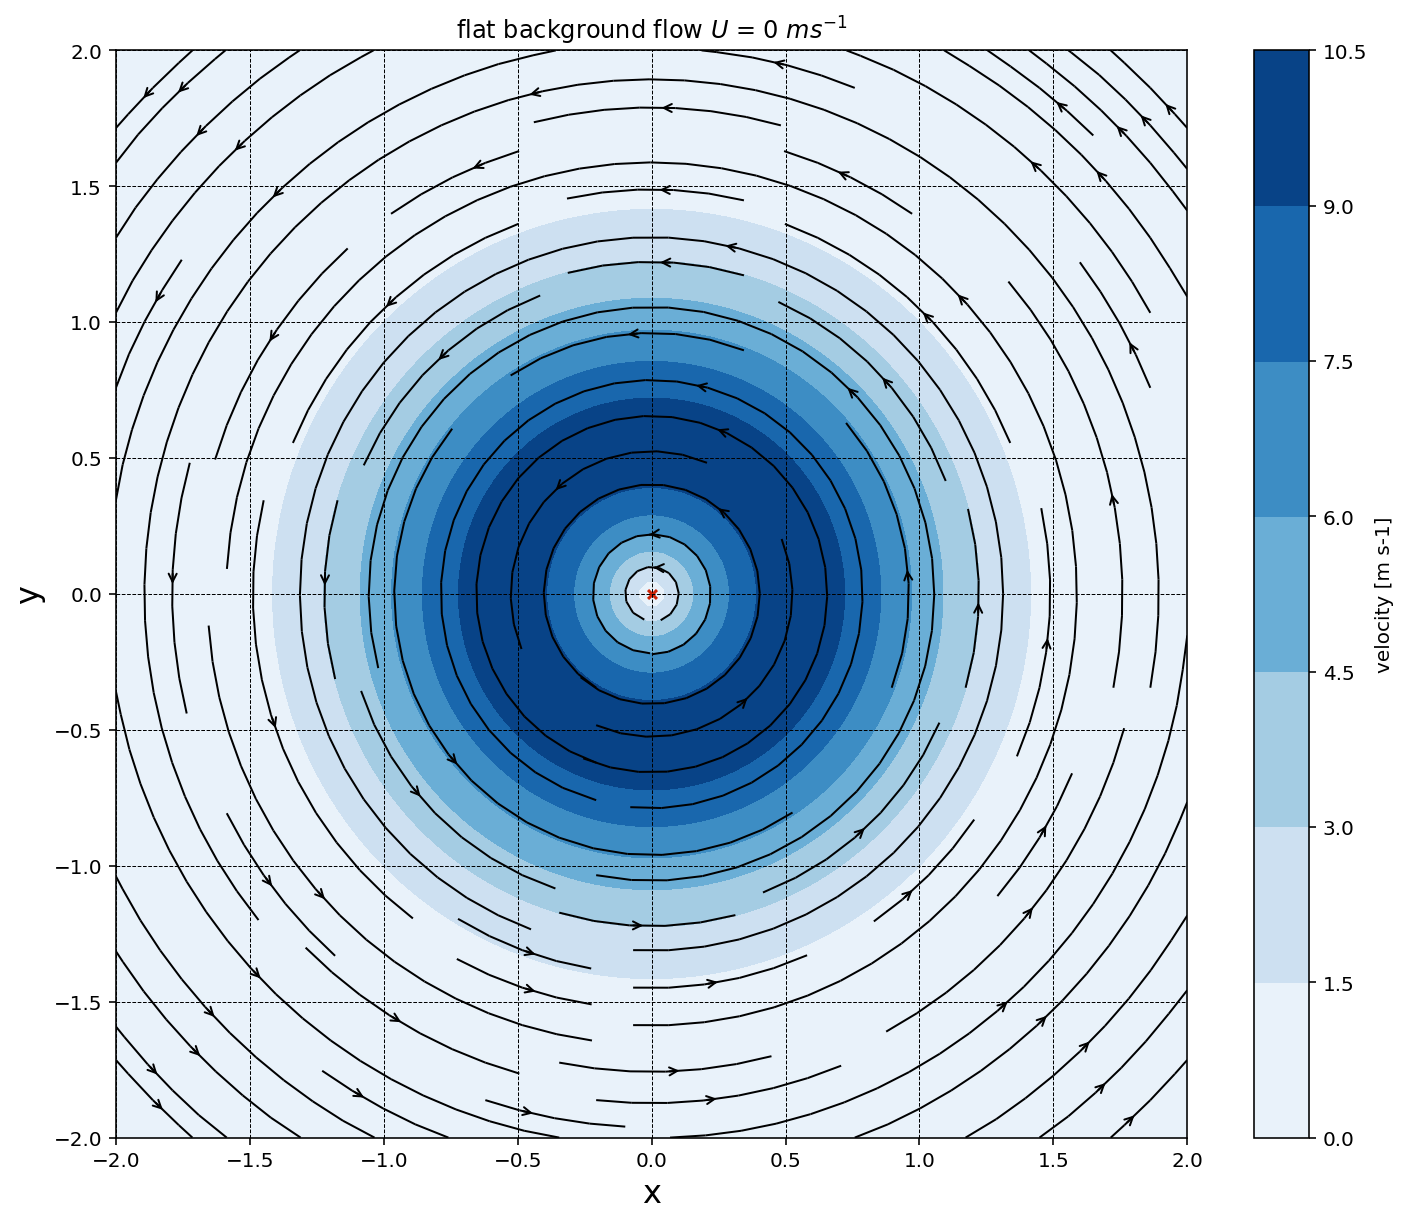

In [6]:
size=12

fig = plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size-2))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.grid(color='black', linestyle='--', linewidth=0.5)

# plt.title("Couette background flow $U_{max}$ = 5 $ms^{-1}$")
plt.title("{} background flow $U$ = {} $ms^{{-1}}$".format(flow,umax))


plt.contourf(X, Y, np.sqrt(u**2+v**2), cmap='Blues') # 20, vmin=0,vmax=13, 
cbar = plt.colorbar()
cbar.ax.set_ylabel('velocity [m s-1]')

plt.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->', color='k')
plt.scatter(center[0], center[1], color='#CD2305', s=20, marker='x')
plt.show()

In [7]:
vvort = vertical_vorticity(u, v, 20000, 20000)

In [8]:
tgradv = velocity_gradient_tensor(u=u, v=v, w=0, dx=20000, dy=20000, dz=0)

In [10]:
q = q(tgradv)

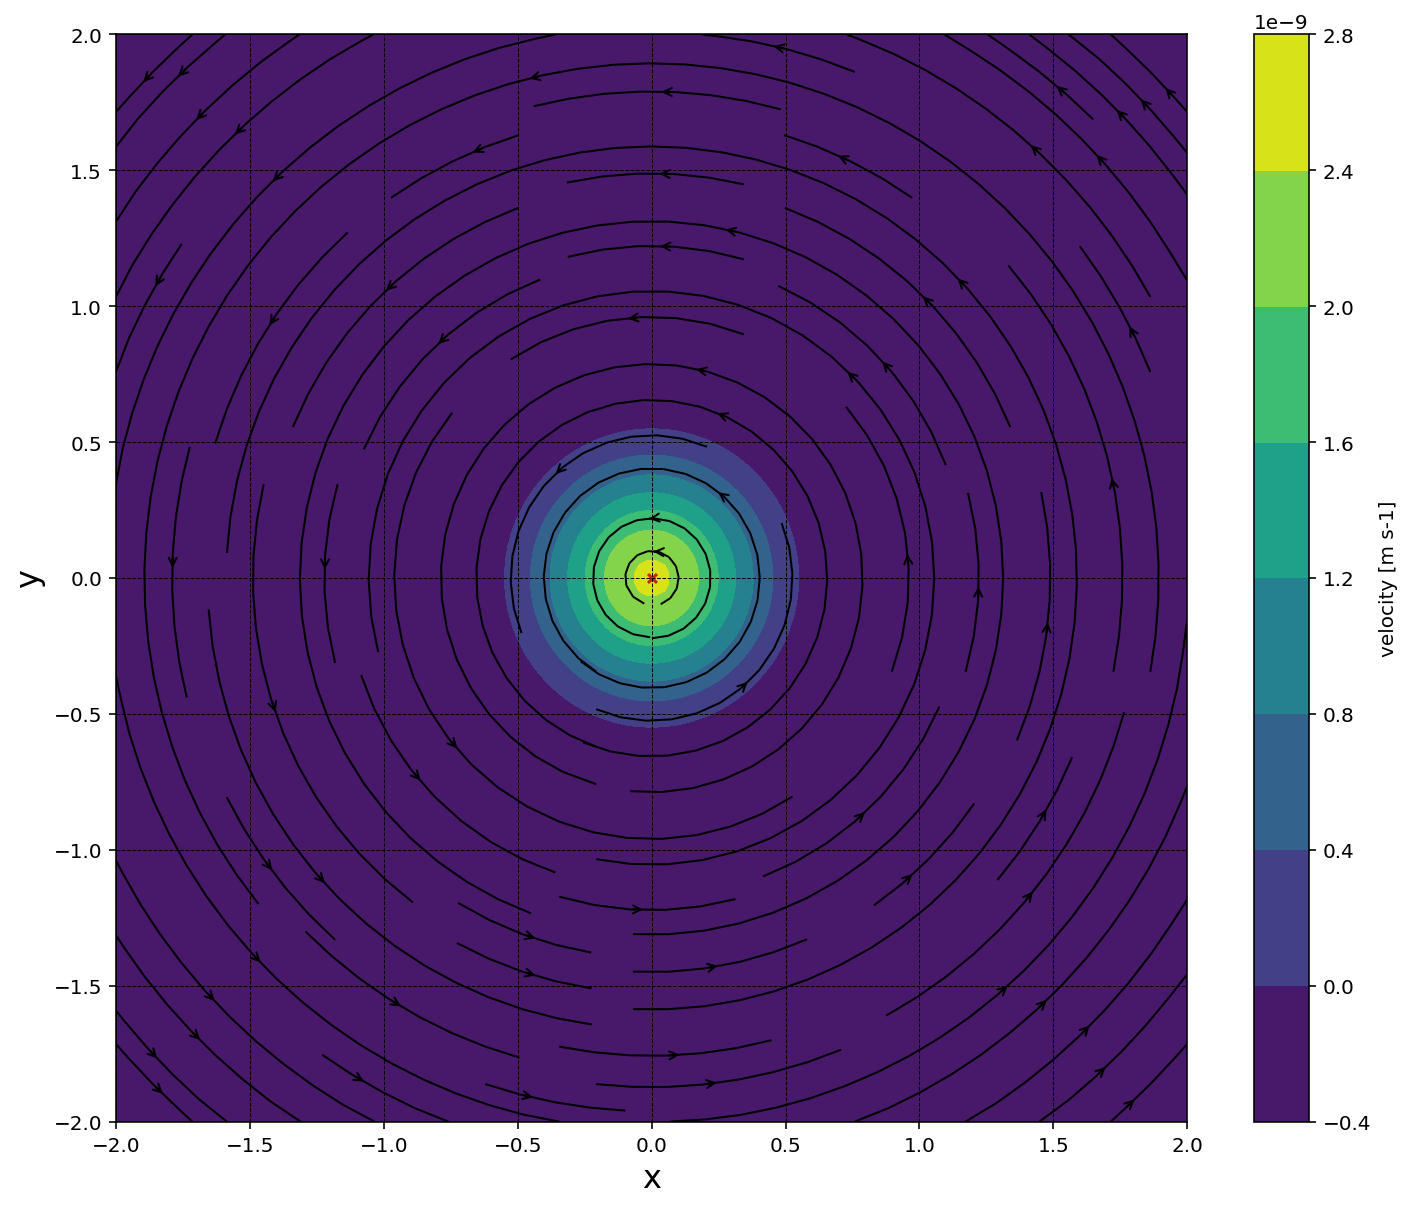

In [11]:
size=12

fig = plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size-2))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.grid(color='black', linestyle='--', linewidth=0.5)

plt.contourf(X, Y, q) # 20, vmin=0,vmax=13, 
cbar = plt.colorbar()
cbar.ax.set_ylabel('velocity [m s-1]')

plt.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->', color='k')
plt.scatter(center[0], center[1], color='#CD2305', s=20, marker='x')
plt.show()